# Real or Not? NLP with Disaster Tweets (Kaggle)

  **Task**: Predict which Tweets are about real disasters and which ones are not
  
## What am I predicting?
You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

## Columns
**id** - a unique identifier for each tweet <br/>
**text** - the text of the tweet <br/>
**location** - the location the tweet was sent from (may be blank) <br/>
**keyword** - a particular keyword from the tweet (may be blank) <br/>
**target** - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


**Link to the dataset:** https://www.kaggle.com/c/nlp-getting-started/data

# Exploratory Data Analysis


In [187]:
# importing important libs
import pandas as pd
import numpy as np
from random import shuffle
import random

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 


import re
import os
from tqdm.notebook import tqdm
from collections import Counter


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [188]:
# Loading the data
tweet = pd.read_csv("train.csv")

In [189]:
tweet.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


The id column is an unique identifier for each tweet, we are going to drop it.

In [190]:
# dropping the id column
tweet.drop(["id"], axis = 1, inplace = True)

In [191]:
# shape of the data
tweet.shape

(7613, 4)

In [192]:
tweet.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

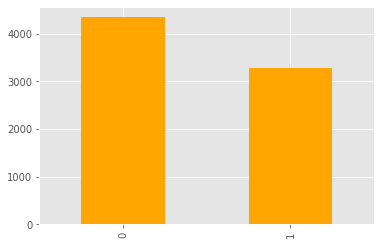

In [194]:
# our data is slightly imbalanced
# 1 represents the tweet is about real disaster
# 0 means normal tweet
# cf.set_config_file(theme="ggplot") # Set themes
tweet.target.value_counts().plot(kind = "bar", color = "orange")

## Analysis of the "text" column

In [195]:
# this function will print random texts from the data
def print_random(data=None, count=5):
    done = []
    index = np.random.randint(low=0, high=tweet.shape[0])
    for i in range(0, count+1):
        index = np.random.randint(low=0, high=tweet.shape[0])
        if index not in done:
            print(data["text"].iloc[index])
            print("class: {}".format(data["target"].iloc[index]))
            print(70*"=")
            print("\n")
        else:
            data.append(index)

In [196]:
# printing 10 tweets
print_random(data=tweet, count=15)

Truth...
https://t.co/p5ZIcjUdXO
#News
#BBC
#CNN
#Islam
#Truth
#god
#ISIS
#terrorism
#Quran
#Lies http://t.co/kZhB8zX6YC
class: 1


#sing #tsunami Beginners #computer tutorial.: http://t.co/ia44ncZLif Everyone Wants To Learn To Build A Pc. Re http://t.co/oGTuV1pLhT
class: 0


@paddytomlinson1 ARMAGEDDON
class: 0


DHS Refuses to Call Chattanooga Û÷Islamic TerrorismÛª out of respect for MUSLIMS ... http://t.co/u8RGB51d22 via @po_st http://t.co/2tnu95VGFE
class: 1


Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU
class: 1


@nalathekoala As a health care professional that deals all gun violence sequalae I consider suicides injuries accidents and homicides
class: 0


Fear is the mind killer. Fear is the little-death that brings total obliteration.  Bene Gesserit Litany Against Fear Dune   @atgrannyshouse
class: 0


That rainstorm didn't last nearly long enough
class: 1


If anything happens I will f

In [197]:
print_random(data=tweet, count=5)

#TeamFollowBack Madhya Pradesh Train Derailment: Village Youth Saved Many Lives  #FollowBack
class: 1


I'm about to cook your Smokey the Bear saving forest fires face ass  https://t.co/WtGGqS5gEh
class: 0


3 former executives to be prosecuted in Fukushima nuclear disaster http://t.co/zsDVWEgLF5
class: 1


11000 SEEDS 30 VEGETABLE FRUIT VARIETY GARDEN KIT EMERGENCY SURVIVAL GEAR MRE  - Full reaÛ_ http://t.co/DchfPXgY2m http://t.co/UgHpTzjuLK
class: 0


Exquisite asian in sto... http://t.co/Y9w0V6Te9O #cumshot #sex #porn #video #porno #free
class: 0


@tyleroakley IM SCREAMING
class: 0




**Some of the tweets contains usernames of other twitter accounts user names, links, integers, hashtags etc. It is important to note that the hashtag can give us lot of information regarding the tweet**

In [198]:
dis_words = " ".join(tweet[tweet["target"] == 1]["text"])
dis_count = Counter(dis_words.split())

norm_words = " ".join(tweet[tweet["target"] == 0]["text"])
norm_count = Counter(norm_words.split())

In [199]:
# most occured words in normal tweets
norm_count.most_common(40)

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('I', 938),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442),
 ('on', 387),
 ('-', 374),
 ('with', 349),
 ('that', 326),
 ('The', 295),
 ('it', 290),
 ('be', 268),
 ('like', 233),
 ('this', 225),
 ('by', 225),
 ('have', 219),
 ('at', 212),
 ('was', 205),
 ('your', 201),
 ('me', 195),
 ('are', 195),
 ('just', 193),
 ('so', 190),
 ('&amp;', 190),
 ("I'm", 185),
 ('??', 183),
 ('but', 177),
 ('out', 172),
 ('up', 167),
 ('from', 166),
 ('not', 162),
 ('will', 146),
 ('as', 143),
 ('get', 142)]

In [200]:
# most occured words in dis tweets
dis_count.most_common(40)

[('the', 1051),
 ('in', 1037),
 ('of', 888),
 ('a', 730),
 ('to', 706),
 ('and', 462),
 ('-', 389),
 ('on', 386),
 ('for', 368),
 ('is', 302),
 ('at', 273),
 ('I', 259),
 ('The', 257),
 ('by', 244),
 ('from', 206),
 ('A', 167),
 ('that', 166),
 ('with', 159),
 ('was', 158),
 ('are', 150),
 ('it', 143),
 ('after', 140),
 ('as', 139),
 ('have', 134),
 ('via', 115),
 ('this', 110),
 ('fire', 108),
 ('my', 107),
 ('over', 107),
 ('...', 106),
 ('&amp;', 105),
 ('you', 103),
 ('be', 103),
 ('has', 98),
 ('been', 93),
 ('In', 90),
 ('who', 89),
 ('California', 86),
 ('killed', 86),
 ('like', 85)]

In [201]:
def show_viz(count=50, target=None):
    lst = []
    if target == "normal":
        for w, n in norm_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)
        df.columns = ["word", "count"]
        df.plot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
                figsize=(12,8),
               color = list('rgbkymc'),)
        plt.xlabel('Words')
        plt.ylabel("Count") 

        
    elif target == "disaster":
        for w, n in dis_count.most_common(count):
            lst.append([w,n])
        df = pd.DataFrame(data=lst)
    
        df.columns = ["word", "count"]
        df.plot(kind="bar",
                 x="word",
                 y="count",
                 title=f"{count} Most common words in {target} tweets",
               figsize=(12,8),
               color = list('rgbkymc'),)
        plt.xlabel('Words')
        plt.ylabel("Count") 
        

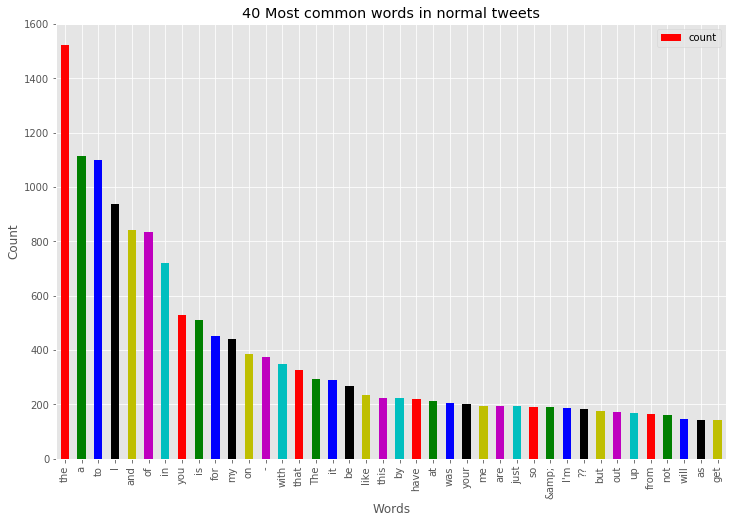

In [203]:
# 50 most appeared words in normal tweets
show_viz(target="normal", count=40)

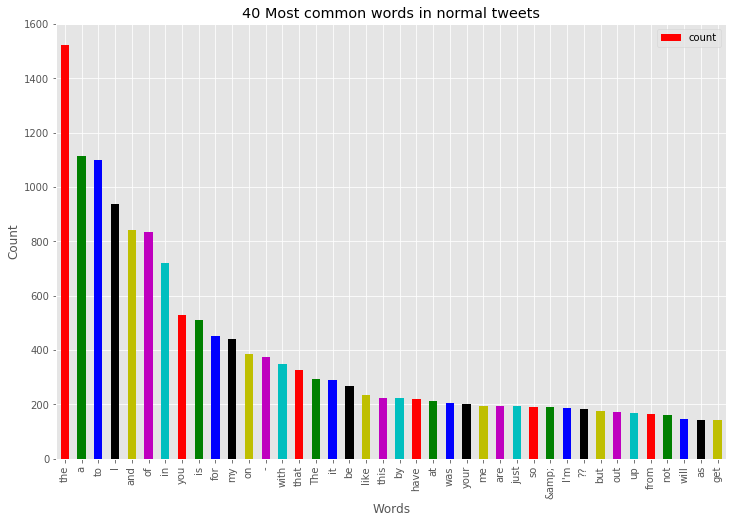

In [204]:
# 100 most appeared tweets in normal tweets
show_viz(target="normal", count=40)

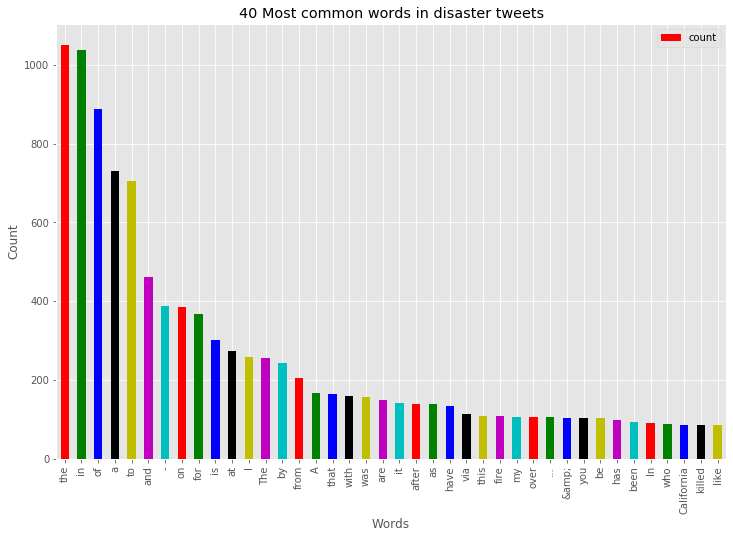

In [205]:
# 50 most appeared words in disaster tweets
show_viz(target="disaster", count=40)

The above visualizations can give us a lot of insight regarding our data but it can be misleading as well as we have not preprocessed our data. We have a bunch of stopwords in our data. So, now
lets make a wordcloud where we will ignore the stop words and visualize the "text" column.

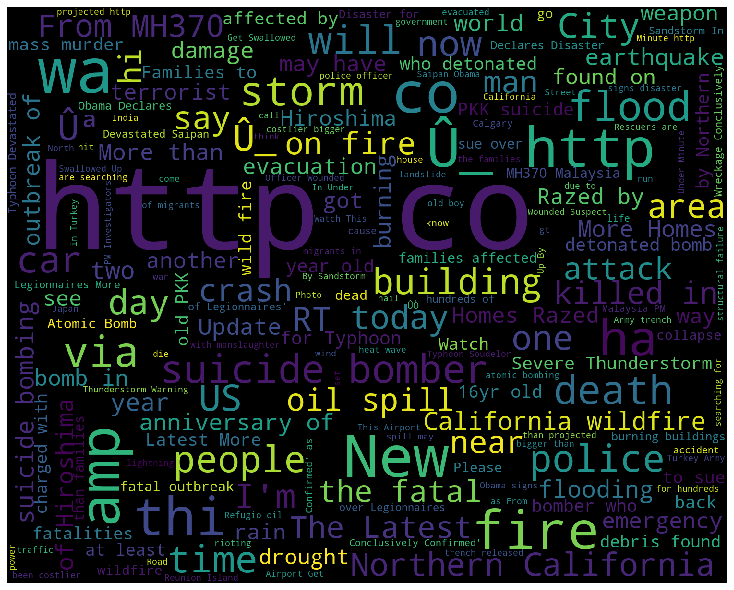

In [90]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS) 

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(dis_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

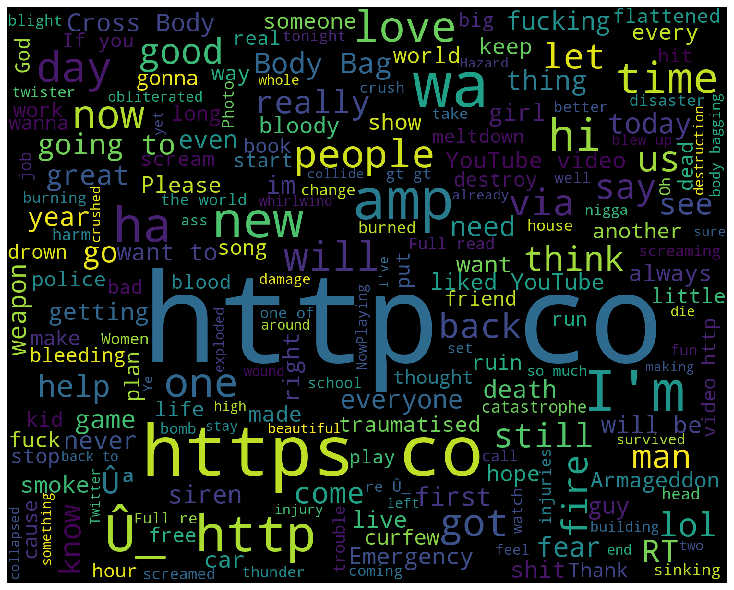

In [91]:
# We want to not see the stop words at all
stopwords = set(STOPWORDS) 

# Plotting the word cloud od disaster tweets
wordcloud = WordCloud(width = 1500, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(norm_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

 We can conclude that the tweets contains a lot of links of other websites and that can be useful for our model.

## Analysis of the "location" column

In [206]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [207]:
# Total NAN values
tweet["location"].isna().sum()

2533

In [208]:
total_con = len(tweet.location.value_counts())
print(f"There is all total {total_con} number of unique countries available.")

There is all total 3341 number of unique countries available.


In [209]:
# This function will help us to visualize the hotspots
normal_tweet_location = tweet[tweet["target"] == 0][["location", "target"]]["location"].value_counts(dropna = False)
disaster_tweet_location = tweet[tweet["target"] == 1][["location", "target"]]["location"].value_counts(dropna = False)


In [210]:
# From series to dataframe
normal_tweet_location_df = normal_tweet_location.to_frame().reset_index()
normal_tweet_location_df.columns = ["country", "count"]
disaster_tweet_location_df = disaster_tweet_location.to_frame().reset_index()
disaster_tweet_location_df.columns = ["country", "count"]


In [211]:
normal_tweet_location_df = normal_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

disaster_tweet_location_df = disaster_tweet_location_df.sort_values(by = ["count"],
                                                                ascending = False,
                                                                kind='quicksort',
                                                                na_position='last')

In [212]:
normal_tweet_location_df.head(5)

,country,count
0,NaN,1458
1,New York,55
2,USA,37
3,London,29
4,United States,23


In [213]:
disaster_tweet_location_df.head(5)

,country,count
0,NaN,1075
1,USA,67
2,United States,27
3,Nigeria,22
4,India,20


In [217]:
# The below function helps us to visualize the country column in threshold of occurence

def location_viz(low = 0, high = 50, target = None):
    if target == "normal":
        count_dataframe = normal_tweet_location_df[normal_tweet_location_df["count"].apply(lambda x: high >= x >=low)]
        
        
        count_dataframe.plot(kind = "bar",
        x = "country",
        y = "count",
        color="blue",
        title=f"Range: {high}-{low}, {target} Tweets",
        figsize = (12, 8),
        )
        plt.xlabel("Country")
        plt.ylabel("Count")
                                                                            
    elif target == "disaster":
        count_dataframe = disaster_tweet_location_df[disaster_tweet_location_df["count"].apply(lambda x: high >=x >=low)]
        
        
        count_dataframe.plot(kind = "bar",
        x = "country",
        y = "count",
        color="red",
        title=f"Range: {high}-{low}, {target} Tweets",
                            figsize = (12, 8),)
        plt.xlabel("Country")
        plt.ylabel("Count")

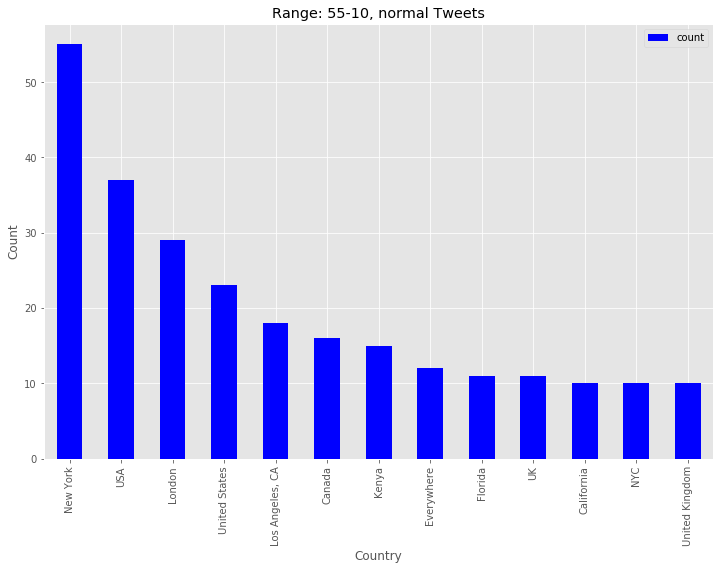

In [218]:
location_viz(low = 10, high = 55, target="normal");

As we can see above, in normal tweets the most common countries are the above. Also, it is very important to note that we have all total 1458 NAN values in normal tweets.

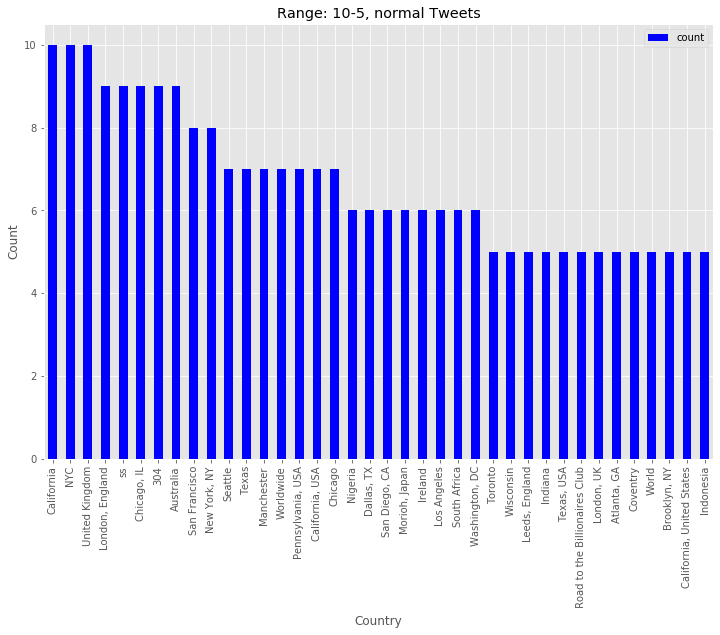

In [219]:
location_viz(low = 5, high = 10, target="normal");

The above are the countries that occures 10 to 5 times in normal tweets. We can simply see the count by just hovering over the plot.

The above plot tells us that there are many countries that occures 1 to 5 times in normal tweets. That tells us that
if we perform one hot encoding over the country column, we can easily run into **curse of dimensionality** problem. We need to clean the location column as well. 

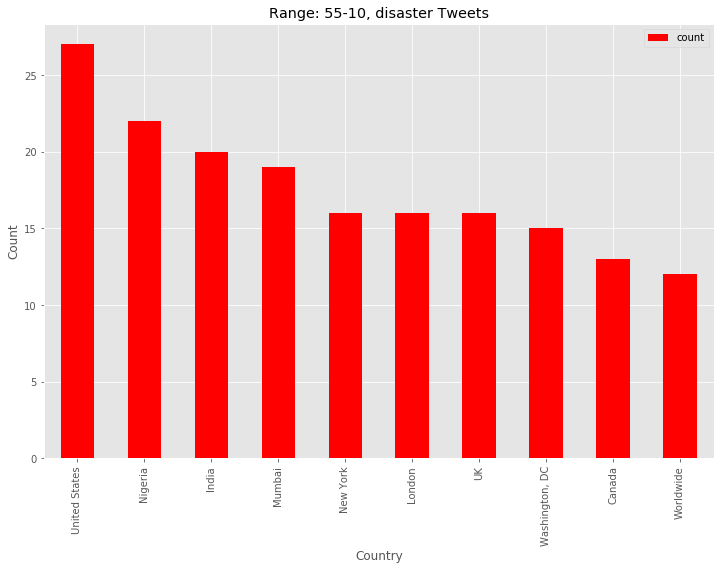

In [220]:
location_viz(low = 10, high = 55, target="disaster");

The above plot shows the most frequent countries that occures in disaster tweets. Here we can see **United States** occures 27 times.

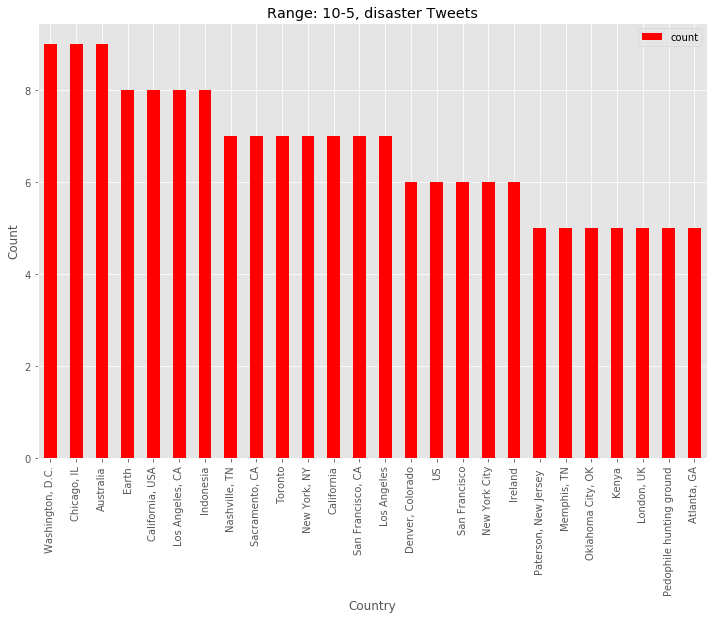

In [221]:
location_viz(low = 5, high = 10, target="disaster");

The above plot shows the most frequent countries in Dis tweets, they occure 10 to 5 times.

There are too many countries that has count in between 5 to 1. **Memphis, TN** occures 5 times.

## Analysis of the "Keyword" column

In [45]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [46]:
total = tweet["keyword"].isnull().sum()
print(f"There are all total {total} NAN values available in keyword column")

There are all total 61 NAN values available in keyword column


In [47]:
normal_tweet_kw = tweet[tweet.target == 0][["keyword"]]
normal_tweet_kw = normal_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
normal_tweet_kw.columns = ["keyword", "count"]


disaster_tweet_kw = tweet[tweet.target == 1][["keyword"]]
disaster_tweet_kw = disaster_tweet_kw.keyword.value_counts(dropna = False).to_frame().reset_index()
disaster_tweet_kw.columns = ["keyword", "count"]

In [48]:
normal_tweet_kw.head(5)

,keyword,count
0,body%20bags,40
1,armageddon,37
2,harm,37
3,deluge,36
4,ruin,36


In [49]:
disaster_tweet_kw.head(5)

,keyword,count
0,NaN,42
1,outbreak,39
2,derailment,39
3,wreckage,39
4,typhoon,37


In [50]:
normal_tweet_lkw = normal_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')


disaster_tweet_lkw = disaster_tweet_kw.sort_values(by = ["count"],
                                                    ascending = False,
                                                    kind='quicksort',
                                                    na_position='last')

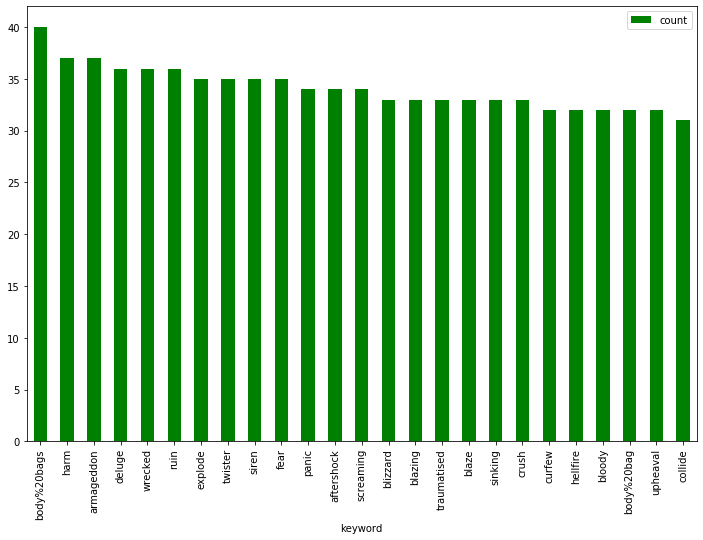

In [114]:
normal_tweet_lkw.head(25).plot(kind = "bar",
                       x = "keyword", 
                       y = "count",  
                       color = "green",
                     figsize = (12, 8))

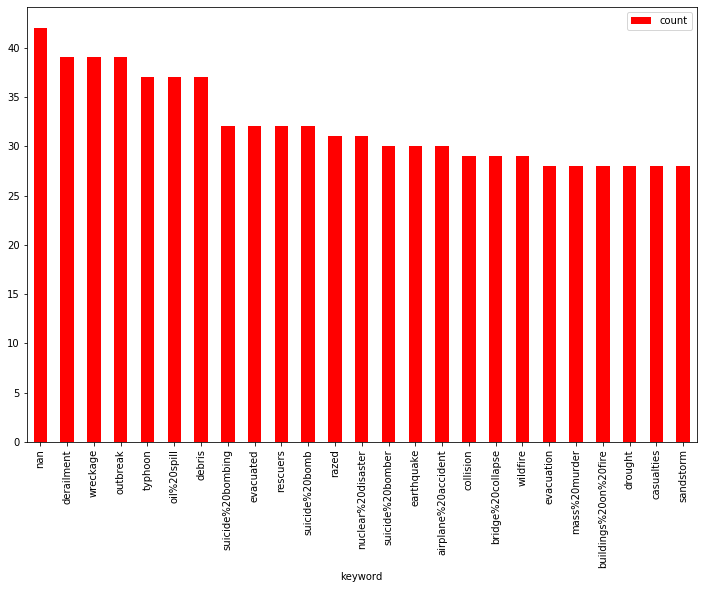

In [119]:
disaster_tweet_lkw.head(25).plot(kind = "bar",
                         x = "keyword",
                         y = "count",
                         color = "red",
                                figsize = (12, 8))

# Data Cleaning and Preprocessing

First and foremost we have to clean the text column of the dataframe. We must remove noise from our text data.

In [120]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [121]:
print_random(data=tweet, count=5)

Storm headed towards Idaho Falls with blowing dust &amp; winds to 60 mph.  US HWY 20 &amp; I15 look out.  #idwx http://t.co/0cR74m1Uxm
class: 1


i strongly support our military &amp; their families just not the cock suckers in DC they work for
class: 0


Longest Streak of Triple-Digit Heat Since 2013 Forecast in Dallas: An unrelenting and dangerous heat wave will... http://t.co/s4Srgrmqcz
class: 1


Agency seeks comments on seismic permits http://t.co/9Vd6x4WDOY
class: 0


@BloopAndABlast Because I need to know if I'm supposed to throw myself off a bridge for a #Collapse or plan the parade. There is no both
class: 0


#Adani &amp; #Modi plan for mining derailed! Australia court blocks huge India-backed coal mine http://t.co/SjE59U2nNm via @YahooNews
class: 0




In [122]:
# Tqdm just gives us the status bar
from tqdm.notebook import tqdm
# Imporing Porter Stemmer
from nltk.stem import PorterStemmer 
count = 0
# Initializing the stemmer
ps = PorterStemmer()

# Stopwords
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"prolly", "probably", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", " ", phrase) # removes usernames
    phrase = re.sub(r"^(\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]\d{3}[\s.-]\d{4}$", " ", phrase)  # removes phone numbers
    return phrase

for sentance in tqdm(tweet['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    tweet["text"][count] = sentance.strip()
    count += 1

In [123]:
# printing some tweets after cleaning and stemming
print_random(data = tweet, count = 15)

quot websit disast tri browser amp machin alway get miss info error due non exist drop
class: 0


hollywood movi trap miner releas chile
class: 0


fukushima amut veget imag sweep across region two year nuclear disast via
class: 1


agre background check think gun weapon gener great equal
class: 0


bowl got think damn blaze damn long
class: 0


untangl requir partner fill need love without fear besttalkradio listen
class: 0


bayelsa poll tension bayelsa patienc jonathan plan hijack apc pdp plan former first ladi
class: 1


tomislav salopek islam state recent hostag
class: 0


perspect terror understand jihadi proto state
class: 1


dead miss famili evacu due flood bukidnon
class: 1


year atom bomb japan still struggl war past anniversari devast wrought b
class: 1


hous save demolit move orca island washington
class: 0


horrif attack wife muslim itali liveleak news
class: 1


fedex no longer transport bioterror germ wake anthrax lab mishap via
class: 1


wild fire west crazi
class:

In [124]:
print_random(data = tweet, count = 20)

anoth white mass murder thank god live california
class: 1


scrambledegg call kia get ban quarantin month end
class: 0


appar face scream get emot attach cheat
class: 0


hollywood movi trap miner releas chile
class: 0


usa today fedex no longer transport bioterror pathogen newsintweet
class: 0


nation brief west california spring oil spill estim grow document releas wednesday nyt
class: 1


came idea fragranc concept bath bomb call blood enemi say bath
class: 1


sandstorm woo hoo
class: 1


enabl possibl collaps industri
class: 0


anchorag job emerg medicin nurs practition healthcar recruit counselor wasilla ak em
class: 0


media pakistan cover captur terrorist moham nave
class: 0


go surviv devast
class: 1


passeng know mass murder take place faroeisland everi year
class: 1


plu side look sky last night ablaz
class: 0


star war power jedi collect battl droid hasbro full read ebay
class: 0


call base conserv u think okay duck militari servic amp contribut thousand hillaryc

In [125]:
tweet.tail(5)

,keyword,location,text,target
7608,NaN,NaN,two giant crane hold bridg collaps nearbi home,1
7609,NaN,NaN,control wild fire california even northern par...,1
7610,NaN,NaN,volcano hawaii,1
7611,NaN,NaN,polic investig e bike collid car littl portug ...,1
7612,NaN,NaN,latest home raze northern california wildfir a...,1


# Feature Engineering and Dimensionality Reduction

Now, we will perform feature engineering then we will apply some dimensionality reduction techniques.

In [126]:
tweet.head(5)

,keyword,location,text,target
0,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,NaN,NaN,forest fire near la rong sask canada,1
2,NaN,NaN,resid ask ishelt place notifi offic no evacu s...,1
3,NaN,NaN,peopl receiv wildfir evacu order california,1
4,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [127]:
location_count = tweet["location"].value_counts().to_dict()

keyword_count = tweet["keyword"].value_counts().to_dict()

In [128]:
# Here we are counting nan values as 0 and we are replacing by count or frequency
count = 0
for k in tweet["keyword"]:
    if k is str:
        tweet["keyword"][count] = keyword_count[k]
    else:
        tweet["keyword"][count] = 0
    count += 1

In [129]:
count = 0
for k in tweet["location"]:
    if k is str:
        tweet["location"][count] = location_count[k]
    else:
        tweet["location"][count] = 0
    count += 1

In [130]:
tweet.head(5)

,keyword,location,text,target
0,0,0,deed reason earthquak may allah forgiv us,1
1,0,0,forest fire near la rong sask canada,1
2,0,0,resid ask ishelt place notifi offic no evacu s...,1
3,0,0,peopl receiv wildfir evacu order california,1
4,0,0,got sent photo rubi alaska smoke wildfir pour ...,1


In [131]:
# saving the preprocessed dataframe
tweet.to_csv('cleaned_tweets.csv') 

In [132]:
X_df = tweet.drop(["target"],axis = 1)
y_df = tweet["target"]

In [133]:
X_df.head(5)

,keyword,location,text
0,0,0,deed reason earthquak may allah forgiv us
1,0,0,forest fire near la rong sask canada
2,0,0,resid ask ishelt place notifi offic no evacu s...
3,0,0,peopl receiv wildfir evacu order california
4,0,0,got sent photo rubi alaska smoke wildfir pour ...


In [140]:
# performing oversampling using imblearn module
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_df, y_df)

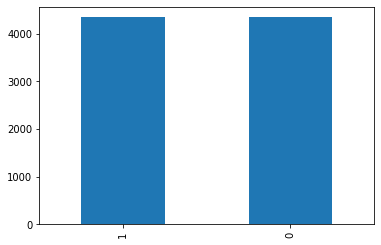

In [141]:
y_oversampled.value_counts().plot(kind = "bar")
# Hence balanced

In [142]:
# taking a glimpse
X_oversampled.head(5)

,keyword,location,text
0,0,0,deed reason earthquak may allah forgiv us
1,0,0,forest fire near la rong sask canada
2,0,0,resid ask ishelt place notifi offic no evacu s...
3,0,0,peopl receiv wildfir evacu order california
4,0,0,got sent photo rubi alaska smoke wildfir pour ...


In [143]:
# taking another glimpse
y_oversampled.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [144]:
# we are using tf-idf vectorizer
# here we are using one-gram and tri-gram as our features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3))
X= vectorizer.fit_transform(X_oversampled["text"].values.ravel())

In [151]:
# feature engineered train data
X.shape

(8684, 95079)

In [152]:
y = y_oversampled

In [153]:
# target column
y.shape

(8684,)

In [154]:
# checking if the training data is a sparse matrix
type(X)

scipy.sparse.csr.csr_matrix

Now let's apply T-sne to get an intuition of how the data is scattered in 8684 dimensions. We will make the 8684 dimension data to 2 dimension data to get an intuition of how they are scattered in the high dimension space. T-sne takes the points which are in the same neighborhood and embed them to the low dimensional space.

In [163]:
# Dimensionality reduction
from sklearn.manifold import TSNE
def show_Tsne(perplexity = None, x = None, y = None):    
    X_embedded = TSNE(n_components=2, perplexity=perplexity,n_iter=1500,n_jobs=-1).fit_transform(X)
    embedded = pd.DataFrame(X_embedded)
    embedded.columns = ["f1", "f2"]
    embedded["class"] = y
    def change(x):
        if x == 1:
            return "Disaster"
        else:
            return "Normal"

    embedded["class"] = embedded["class"].apply(change)
    plt.figure(figsize = (12, 8))
    sns.scatterplot(x="f1", y="f2", hue="class", data = embedded)

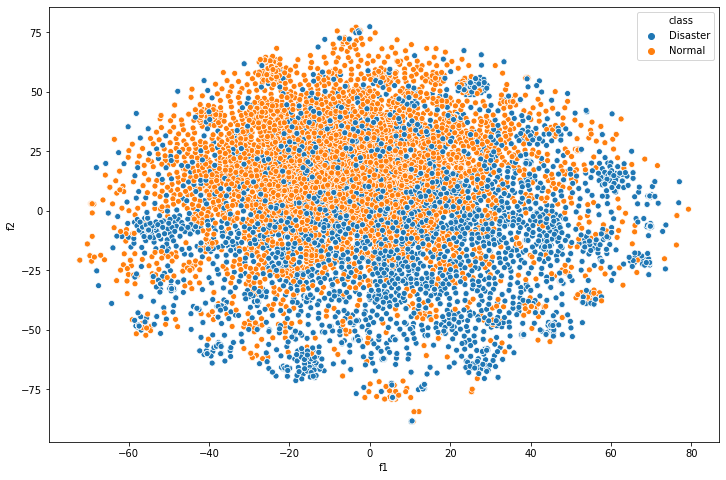

In [164]:
# T-SNe with perplexity 30
show_Tsne(perplexity= 30, x = X, y = y)

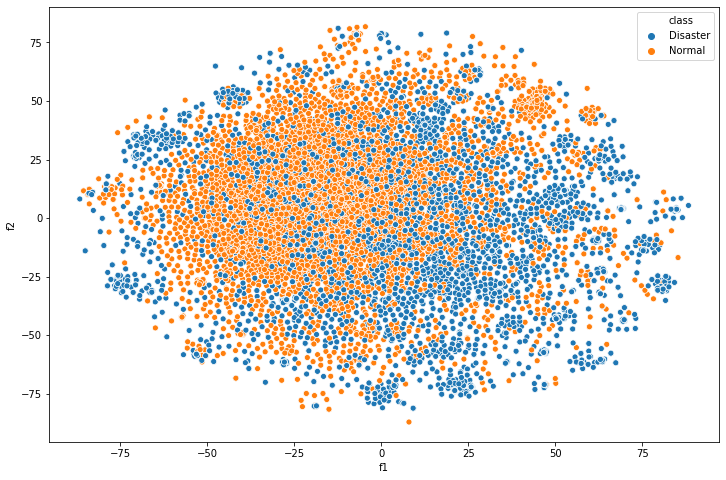

In [165]:
# T-SNE with perplexity 25
show_Tsne(perplexity= 25, x = X, y = y)

Here we can see the vectors regarding **normal tweets** are forming a cluster in 2 dim and the other class is a bit more scattered but some small clusters are being formed.

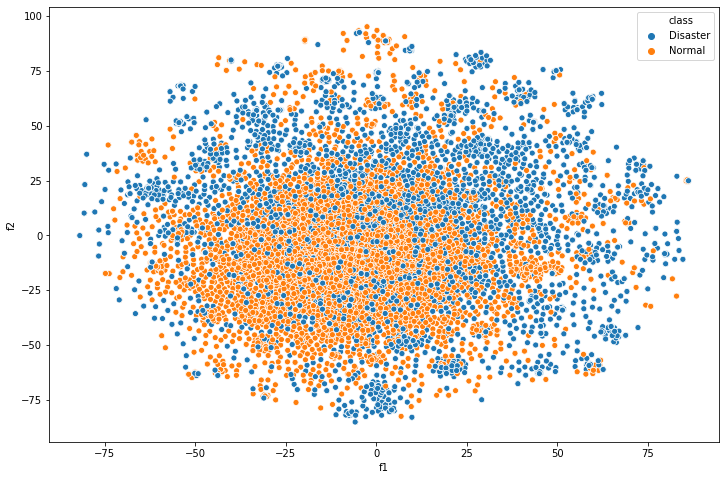

In [166]:
show_Tsne(perplexity= 20, x = X, y = y)

The dataset might be almost separable in the high dimensional space so we will apply **logistic regression** as it works pretty good with high dimensional datasets.

In [167]:
# Splitting the dataset into train and test, we are using 20% data for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [168]:
# the sparse matrix which represents the text data
type(X_train)

scipy.sparse.csr.csr_matrix

# Modelling

In [169]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


C_vals = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]

for num in C_vals:
    clf = LogisticRegression(C=num, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    f1 = f1_score(y_test, predicted)
    print(f"F1 score = {f1}")
    print("C value = {}".format(num))
    print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
    print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))
    print(70*"=")

F1 score = 0.0
C value = 0.0001
Train Accuracy = 50.15114437886857%
Test Accuracy = 49.395509499136445%
F1 score = 0.16684045881126172
C value = 0.001
Train Accuracy = 55.57794731538793%
Test Accuracy = 54.00115141047783%
F1 score = 0.6521739130434783
C value = 0.01
Train Accuracy = 80.62473009932344%
Test Accuracy = 73.28727691421992%
F1 score = 0.7716535433070866
C value = 0.1
Train Accuracy = 88.15315963725348%
Test Accuracy = 79.96545768566494%
F1 score = 0.813953488372093
C value = 1
Train Accuracy = 95.00503814596229%
Test Accuracy = 82.4985607369027%
F1 score = 0.8365155131264917
C value = 10
Train Accuracy = 98.35900388656974%
Test Accuracy = 84.22567645365572%
F1 score = 0.8339307048984469
C value = 100
Train Accuracy = 98.56052972506117%
Test Accuracy = 83.99539435808866%
F1 score = 0.8320382546323969
C value = 1000
Train Accuracy = 98.56052972506117%
Test Accuracy = 83.82268278641337%
F1 score = 0.8293269230769231
C value = 10000
Train Accuracy = 98.56052972506117%
Test Accu

In [170]:
# 10 is the best hyperparameter
clf = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

clf.fit(X_train, y_train)
print(f"F1 score = {f1}")
print("C value = {}".format(num))
print("Train Accuracy = {}%".format(clf.score(X_train, y_train)*100))
print("Test Accuracy = {}%".format(clf.score(X_test, y_test)*100))

F1 score = 0.8293269230769231
C value = 10000
Train Accuracy = 98.35900388656974%
Test Accuracy = 84.22567645365572%


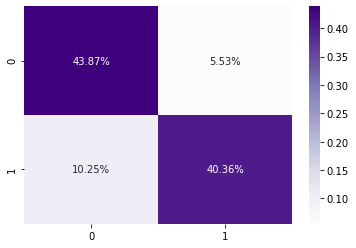

In [171]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples');

In [172]:
# saving the model
from joblib import dump

# saving the model
dump(clf, "Log-Reg-10.pkl") 

['Log-Reg-10.pkl']

In [173]:
# tesing 
text = ["""

Is it good?

"""]
feature_representation = vectorizer.transform(text).toarray()
if clf.predict(feature_representation) == 1:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][1]*100)
    print("Disaster tweet! {}%".format(prob))
else:
    prob = "{0:.2f}".format(clf.predict_proba(feature_representation)[0][0]*100)
    print("Normal tweet! {}%".format(prob))

Normal tweet! 91.38%


# Testing our model on text data

In [174]:
# loading the test data
test = pd.read_csv("test.csv")
test.drop(["keyword", "location", "id"], axis = 1, inplace = True)

In [175]:
# peaking into the data
test.head(5)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [176]:
# we need to preprocess the test data as well

count = 0
for sentance in tqdm(test['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(ps.stem(e.lower()) for e in sentance.split() if e.lower() not in stopwords)
    sentance.replace("#", "").replace("_", " ")
    test["text"][count] = sentance.strip()
    count += 1
    

In [177]:
test.tail(10)

,text
3253,malaysian pm confirm debri miss flight
3254,offici alabama home quarantin possibl ebola ca...
3255,see old pkk suicid bomber deton bomb turkey ar...
3256,confer attende blue line airport derail pleas ...
3257,death toll suicid car bomb ypg posit villag ra...
3258,earthquak safeti lo angel safeti fasten xrwn
3259,storm ri wors last hurrican hardest hit yard l...
3260,green line derail chicago
3261,meg issu hazard weather outlook hwo
3262,cityofcalgari activ municip emerg plan yycstorm


In [178]:
test_input = test["text"].values
print(X_test)

  (0, 28695)	0.2131928214950144
  (0, 30642)	0.2131928214950144
  (0, 44456)	0.2131928214950144
  (0, 57947)	0.2131928214950144
  (0, 4227)	0.2131928214950144
  (0, 5567)	0.23628366955148702
  (0, 62163)	0.23628366955148702
  (0, 94234)	0.2131928214950144
  (0, 28694)	0.2131928214950144
  (0, 30641)	0.2131928214950144
  (0, 44455)	0.2131928214950144
  (0, 4226)	0.2131928214950144
  (0, 5566)	0.23628366955148702
  (0, 62162)	0.23628366955148702
  (0, 94233)	0.2131928214950144
  (0, 4203)	0.16208277379384495
  (0, 5565)	0.23628366955148702
  (0, 62159)	0.2131928214950144
  (0, 57945)	0.20859825426989598
  (0, 44397)	0.11794472266531975
  (0, 30640)	0.16641346058693615
  (0, 57450)	0.0864569834031319
  (0, 28663)	0.17069497594785152
  (0, 67816)	0.16563800398784306
  (1, 13589)	0.2317012352883199
  :	:
  (1736, 82164)	0.18936667827910364
  (1736, 54774)	0.18936667827910364
  (1736, 5021)	0.18936667827910364
  (1736, 14727)	0.18936667827910364
  (1736, 61394)	0.18936667827910364
  (1736, 8

In [179]:
# applying the same TF-IDF
X_test = vectorizer.transform(test_input).toarray()

In [180]:

X_test.shape

(3263, 95079)

In [181]:
predicted = []
for i in clf.predict(X_test):
    predicted.append(i)

In [182]:
new = pd.read_csv("test.csv")
new.drop(["keyword", "location", "id"], axis = 1, inplace = True)
new["preprocessed_test"] = test.text
new["predicted"] = predicted


In [183]:
new.head(70)

,text,preprocessed_test,predicted
0,Just happened a terrible car crash,happen terribl car crash,1
1,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon,1
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...,1
3,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir,1
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
...,...,...,...
65,Horrible Accident Man Died In Wings of Airpla...,horribl accid man die wing,1
66,@god if an accident were to happen on this air...,accid happen airplan idc rest luggag complet d...,0
67,Horrible Accident Man Died In Wings of Airplan...,horribl accid man die wing airplan,1
68,#UPDATE: Picture from the Penn Twp. airplane a...,updat pictur penn twp airplan accid,1


In [184]:
# saving the dataframe as an excel file
new.to_excel("predicted_test.xlsx") 